# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [8]:
client = MongoClient(mongod_connect)
db = client.gp12 # use or create a database named demo
final_collection = db.lab11 #use or create a collection named tweet_collection
final_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [ ]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [ ]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [ ]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

## Use the REST API to Collect Tweets

Authorize the REST API 

In [9]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [10]:
count = 3000 #number of returned tweets, default and max is 100
geocode ="43.196945,-71.537395,150mi"# defin the location, in Harrisonburg, VA
q = "covid19"                              #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [11]:
search_results = rest_api.search.tweets(count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        final_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Sun Dec 13 21:25:03 +0000 2020'
'Sun Dec 13 21:25:00 +0000 2020'
'Sun Dec 13 21:24:54 +0000 2020'
'Sun Dec 13 21:24:05 +0000 2020'
'Sun Dec 13 21:23:51 +0000 2020'
'Sun Dec 13 21:23:47 +0000 2020'
'Sun Dec 13 21:22:10 +0000 2020'
'Sun Dec 13 21:21:09 +0000 2020'
'Sun Dec 13 21:21:06 +0000 2020'
'Sun Dec 13 21:20:52 +0000 2020'
'Sun Dec 13 21:20:39 +0000 2020'
'Sun Dec 13 21:20:07 +0000 2020'
'Sun Dec 13 21:19:29 +0000 2020'
'Sun Dec 13 21:18:31 +0000 2020'
'Sun Dec 13 21:16:58 +0000 2020'
'Sun Dec 13 21:16:47 +0000 2020'
'Sun Dec 13 21:16:42 +0000 2020'
'Sun Dec 13 21:16:35 +0000 2020'
'Sun Dec 13 21:16:21 +0000 2020'
'Sun Dec 13 21:15:42 +0000 2020'
'Sun Dec 13 21:15:15 +0000 2020'
'Sun Dec 13 21:14:10 +0000 2020'
'Sun Dec 13 21:13:46 +0000 2020'
'Sun Dec 13 21:13:04 +0000 2020'
'Sun Dec 13 21:12:56 +0000 2020'
'Sun Dec 13 21:12:30 +0000 2020'
'Sun Dec 13 21:12:12 +0000 2020'
'Sun Dec 13 21:12:09 +0000 2020'
'Sun Dec 13 21:11:24 +0000 2020'
'Sun Dec 13 21:11:08 +0000 2020'
'Sun Dec 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [12]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            final_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Sun Dec 13 11:32:15 +0000 2020'
'Sat Dec 12 22:35:47 +0000 2020'
'Sat Dec 12 22:18:51 +0000 2020'
'Sat Dec 12 20:26:19 +0000 2020'
'Sat Dec 12 19:10:34 +0000 2020'
'Sat Dec 12 19:01:54 +0000 2020'
'Sat Dec 12 19:01:19 +0000 2020'
'Sat Dec 12 18:54:11 +0000 2020'
'Sat Dec 12 17:24:47 +0000 2020'
'Sat Dec 12 15:46:09 +0000 2020'
'Sat Dec 12 15:45:22 +0000 2020'
'Sat Dec 12 15:37:54 +0000 2020'
'Sat Dec 12 15:22:46 +0000 2020'
'Sat Dec 12 15:20:28 +0000 2020'
'Sat Dec 12 15:18:40 +0000 2020'
'Sat Dec 12 15:18:38 +0000 2020'
'Sat Dec 12 15:15:39 +0000 2020'
'Sat Dec 12 15:12:23 +0000 2020'
'Sat Dec 12 13:29:00 +0000 2020'
'Sat Dec 12 13:24:52 +0000 2020'
'Sat Dec 12 13:22:09 +0000 2020'
'Sat Dec 12 13:07:02 +0000 2020'
'Sat Dec 12 12:55:24 +0000 2020'
'Sat Dec 12 12:47:07 +0000 2020'
'Sat Dec 12 08:54:56 +0000 2020'
'Sat Dec 12 00:41:36 +0000 2020'
'Sat Dec 12 00:40:21 +0000 2020'
'Fri Dec 11 20:53:00 +0000 2020'
'Fri Dec 11 20:49:31 +0000 2020'
'Fri Dec 11 20:49:29 +0000 2020'
'Fri Dec 1

TwitterHTTPError: Twitter sent status 429 for URL: 1.1/search/tweets.json using parameters: (count=3000&geocode=43.196945%2C-71.537395%2C150mi&max_id=1336685804828110850&oauth_consumer_key=LrW7wvuuqZHFI4m9js6yAXbLj&oauth_nonce=4603978265227377321&oauth_signature_method=HMAC-SHA1&oauth_timestamp=1607894841&oauth_token=60388598-jXU1MD84HUZFNSLAAQd92UUhF3LBh8CXvPzGqBzro&oauth_version=1.0&q=covid19&oauth_signature=oOT5CkL2xKGYxTwsrB5pRJ9vb9Y%3D)
details: {'errors': [{'message': 'Rate limit exceeded', 'code': 88}]}

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [13]:
print(final_collection.estimated_document_count())# number of tweets collected

user_cursor = final_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

40922
31313


Create a text index and print the Tweets containing specific keywords. 

In [14]:
final_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [15]:
tweet_cursor = final_collection.find({"$text": {"$search": "covid19"}}) # return tweets contain vote

Use pprint to display tweets

In [16]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Pancho
text: I’m tired of #COVID19 #COVID19
----
name: WR
text: #FreeSpeech #FreedomOfSpeech @SpeechUnion #YeadonUnlocked #IamYeadon #COVID19 #COVID19
----
name: STEVE-O NONEYA
text: How do you feel about this #COVID19   #coronavirus #COVIDー19 #QuestionOfTheDay #QuaratineLife #QuarantineLife
----
name: It is time
text: Look what you did @realdonaldTrump number dead under your watch 1048 #COVID19  #COVID19
----
name: It is time
text: Look what you did @realdonaldTrump number dead under your watch 1049 #COVID19  #COVID19
----
name: It is time
text: Look what you did @realdonaldTrump number dead under your watch 1050 #COVID19  #COVID19
----
name: It is time
text: Look what you did @realdonaldTrump number dead under your watch 1053 #COVID19  #COVID19
----
name: It is time
text: Look what you did @realdonaldTrump number dead under your watch 1055 #COVID19  #COVID19
----
name: It is time
text: Look what you did @realdonaldTrump number dead under your watch 1056 #COVID19  #COVID19


In [17]:
tweet_cursor = final_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pandas to display tweets

In [18]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,timestamp_ms,metadata,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,display_text_range,extended_tweet,possibly_sensitive,extended_entities
0,5fbae828d6ecf1c21a0046c0,Sun Nov 22 22:37:23 +0000 2020,1330641556060184576,1330641556060184576,RT @CharminUltra17: If they tossed and even sh...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,1606084643746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5fbaf1353c33bbaf2160602d,Sat Nov 21 20:20:55 +0000 2020,1330244826047123456,1330244826047123456,RT @SenSanders: I am going down to the Senate ...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,...,NaN,"{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5fbaf13b3c33bbaf216062bd,Sat Nov 21 18:09:36 +0000 2020,1330211777741807619,1330211777741807619,@realDonaldTrump The only dead people that vot...,"<a href=""http://twitter.com/download/iphone"" r...",True,1.330149e+18,1330148622898515969,25073877.0,...,NaN,"{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5fbaf13b3c33bbaf21606290,Sat Nov 21 18:17:45 +0000 2020,1330213829893107717,1330213829893107717,@realDonaldTrump The only dead people that vot...,"<a href=""http://twitter.com/download/iphone"" r...",True,1.330138e+18,1330137741078695939,25073877.0,...,NaN,"{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5fbaf13b3c33bbaf2160628b,Sat Nov 21 18:18:08 +0000 2020,1330213924298514436,1330213924298514436,@realDonaldTrump The only dead people that vot...,"<a href=""http://twitter.com/download/iphone"" r...",True,1.329964e+18,1329963571250335744,25073877.0,...,NaN,"{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5fbaf13b3c33bbaf2160628a,Sat Nov 21 18:18:20 +0000 2020,1330213976748265474,1330213976748265474,@realDonaldTrump The only dead people that vot...,"<a href=""http://twitter.com/download/iphone"" r...",True,1.329963e+18,1329963296854847492,25073877.0,...,NaN,"{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5fbaf13b3c33bbaf21606287,Sat Nov 21 18:18:44 +0000 2020,1330214073779302402,1330214073779302402,@realDonaldTrump @BreitbartNews The only dead ...,"<a href=""http://twitter.com/download/iphone"" r...",True,1.329785e+18,1329784812257890306,25073877.0,...,NaN,"{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5fbae92fd6ecf1c21a0052d6,Sun Nov 22 22:41:46 +0000 2020,1330642658356813828,1330642658356813828,RT @alfonslopeztena: Because Biden won the ele...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,...,1606084906554,NaN,1.330320e+18,1330319748660416513,{'created_at': 'Sun Nov 22 01:18:38 +0000 2020...,"{'url': 'https://t.co/Pm7P9ZKMfo', 'expanded':...",NaN,NaN,NaN,NaN
8,5fbae824d6ecf1c21a00464c,Sun Nov 22 22:37:19 +0000 2020,1330641539173933057,1330641539173933057,RT @CongressmanHice: As more votes are uncover...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,...,1606084639720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5fbae893d6ecf1c21a005122,Sun Nov 22 22:39:10 +0000 2020,1330642002095038474,1330642002095038474,I know I’m late but what’s wrong with male is ...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,1606084750089,NaN,1.329518e+18,1329518451875065860,{'created_at': 'Thu Nov 19 20:14:34 +0000 2020...,"{'url': 'https://t.co/WI2PHUYld5', 'expanded':...",NaN,NaN,NaN,NaN


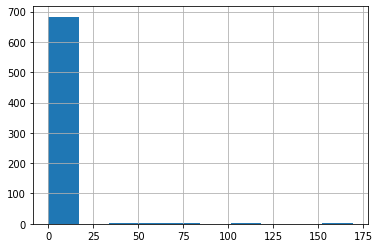

In [19]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count